# Reading and Visualising Data with Pandas

Tamás Gál (tamas.gal@fau.de)


In [1]:
%matplotlib inline
import pandas as pd

import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}\n"
     
      .format(sys.version, pd.__version__, ml.__version__))

Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version: 0.24.1
Matplotlib version: 3.0.2



In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter which are not fixed yet

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`.

### Problems encountered

- the first few lines represent a plain header and need to be skipped
- comments are indicated with `$` at the beginning of the line
- the column separator is `:`
- the decimal delimiter is `,`
- the index column is the first one
- there is a footer to be excluded
- footer exclusion only works with the Python-engine

In [4]:
neutrinos = pd.read_csv('data/neutrinos.csv', 
                 skiprows = 4, 
                 sep=':', 
                 decimal=',',
                 skipfooter=3,
                 index_col = 0,
                 comment='$'
                )
neutrinos.describe()

,azimuth,zenith,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
count,60977.000000,60977.000000,60977.000000,60977.000000,60977.000000,60977.000000,60977.000000,60977.000000
mean,3.144882,1.810655,19.361137,0.521312,0.945783,395.419032,0.916342,0.083658
std,1.810872,0.628794,18.706018,64.066557,71.913940,49.734205,0.065976,0.065976
min,0.000121,0.016811,1.462800,-357.947000,-362.326000,108.190000,0.800399,0.000000
25%,1.577279,1.392345,7.235900,-46.579000,-54.063000,361.685000,0.856287,0.017964
50%,3.143175,1.852539,12.624000,0.589000,1.817000,396.491000,0.922156,0.077844
75%,4.707310,2.285703,23.423000,47.404000,55.594000,432.971000,0.982036,0.143713
max,6.283136,3.138942,99.997002,392.805000,422.195000,701.543000,1.000000,0.199601


### Check the dtypes to make sure everthing is parsed correctly (and is not an `object`-array)

## Exercise 2

Create a histogram of the neutrino energies.

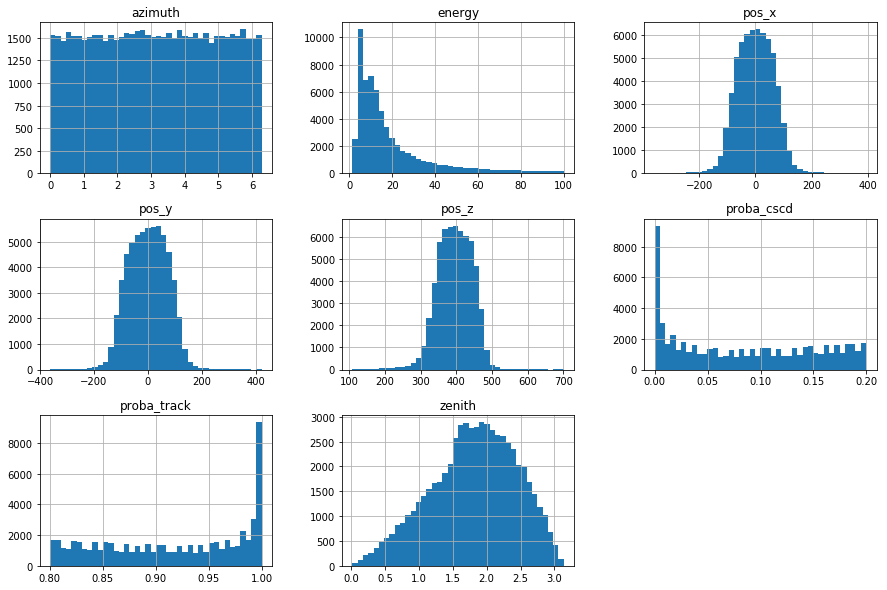

In [6]:
neutrinos.hist(figsize=(15,10), bins=40);

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`.

In [7]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco.describe()

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
count,60978.000000,60978.000000,60978.000000,60978.000000,60978.000000,60978.000000,60978.000000,60978.000000,60978.000000
mean,1.843205,3.144493,9.355685,13.750123,0.315520,-4.253368,0.527294,0.826821,-8.141420
std,0.615931,1.814258,6.841697,11.453600,0.242718,0.713413,59.440264,68.632013,44.961885
min,0.000000,0.000000,-1.506665,0.000000,0.000000,-23.701158,-180.423840,-198.816158,-280.439835
25%,1.452451,1.575020,5.001049,6.795512,0.125000,-4.529071,-46.129207,-53.908694,-43.203164
50%,1.887885,3.144560,7.650021,10.258592,0.125000,-4.098160,0.705231,1.692665,-8.162424
75%,2.303909,4.724388,11.327219,15.966703,0.375000,-3.811067,47.267086,55.186467,28.032977
max,3.139711,6.283134,64.641794,119.671366,0.875000,0.000000,179.143002,187.662192,145.735087


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  using `pd.concat()`

In [8]:
df = pd.concat([neutrinos, reco.add_prefix('reco_')], axis=1)
df.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.04899799823760986,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.28047099709510803,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.1198429986834526,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,0.520486,1.939326,0.06131500005722046,4.7840,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,2.856970,1.678897,0.06146499887108803,3.9833,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


### Problems encountered

- need to define the right axis
- identical column names should be avoided

In [14]:
df = df.dropna()

## Exercise 5

Make a scatter plot to visualise the zenith reconstruction quality.



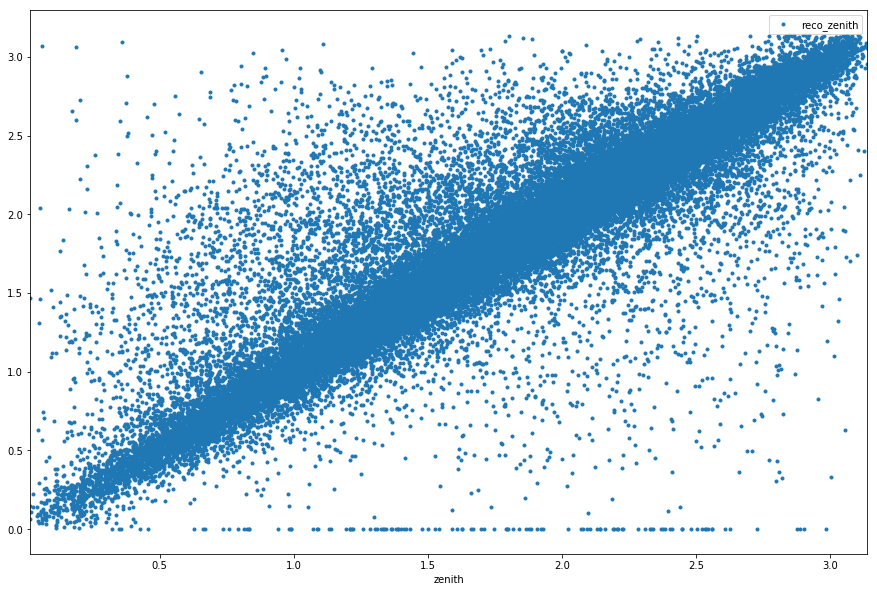

In [15]:
df.plot(x='zenith', y='reco_zenith', style='.', figsize=(15,10))

Text(0, 0.5, 'reco zenith')

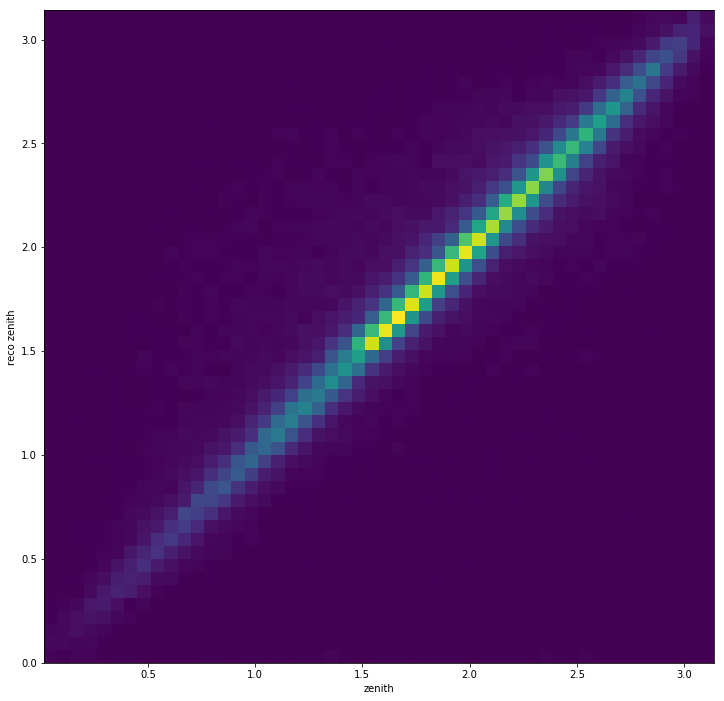

In [19]:
plt.figure(figsize=(12,12))
plt.hist2d(df.zenith, df.reco_zenith.values, bins=50);
plt.xlabel('zenith')
plt.ylabel('reco zenith')

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

**solution 1**: We can create masks and apply the masks to the dataframe to select the lines we want

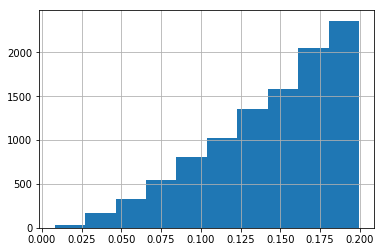

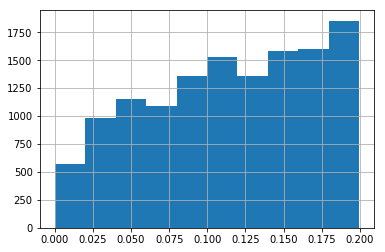

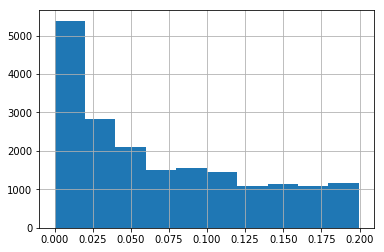

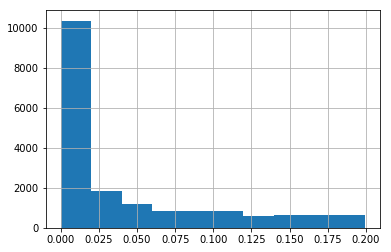

In [25]:
energy_bin_1 = (neutrinos.energy > 1) & (neutrinos.energy < 5)
neutrinos[energy_bin_1].proba_cscd.hist();

plt.show()

energy_bin_2 = (neutrinos.energy > 5) & (neutrinos.energy < 10)
neutrinos[energy_bin_2].proba_cscd.hist();
plt.show()

energy_bin_3 = (neutrinos.energy > 10) & (neutrinos.energy < 20)
neutrinos[energy_bin_3].proba_cscd.hist();
plt.show()

energy_bin_4 = (neutrinos.energy > 20) & (neutrinos.energy < 100)
neutrinos[energy_bin_4].proba_cscd.hist();
plt.show()

**solution 2**: Same solution but with a loop to avoid copying code

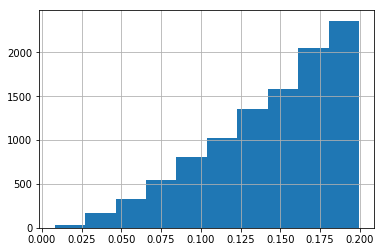

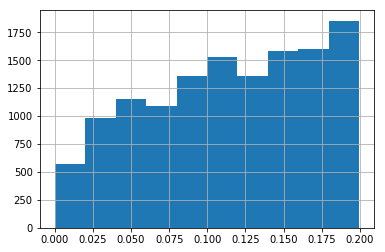

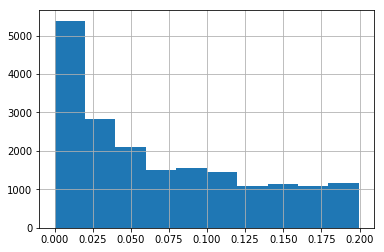

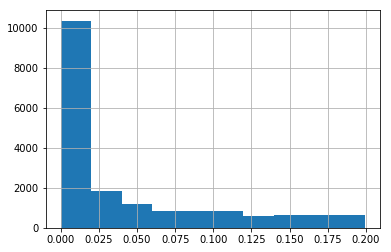

In [31]:
for e_bin in [(1,5), (5,10), (10,20), (20,100)]:
    mask_energy = (neutrinos.energy > e_bin[0]) & (neutrinos.energy < e_bin[1])
    neutrinos[mask_energy].proba_cscd.hist();
    plt.show()

**solution 3**: We create a new column in the `neutrinos` dataframe containing the binning category.    
We can then quickly plot filtering on the new column using `by`. 

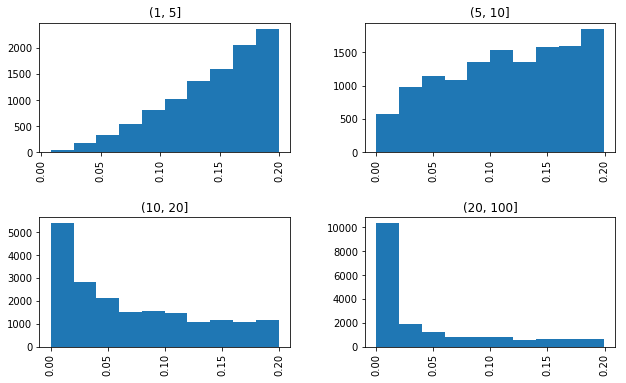

In [51]:
ebins = [1, 5, 10, 20, 100]
neutrinos['ebin'] = pd.cut(neutrinos.energy, ebins)
neutrinos.hist('proba_cscd', by='ebin', figsize=(10,6));

## Exercise 7

Create a 2D histogram showing the distribution of the `x` and `y` values of the starting positions (`pos_x` and `pos_y`) of the neutrinos. This is basically a 2D plane of the starting positions. using the method hist2d

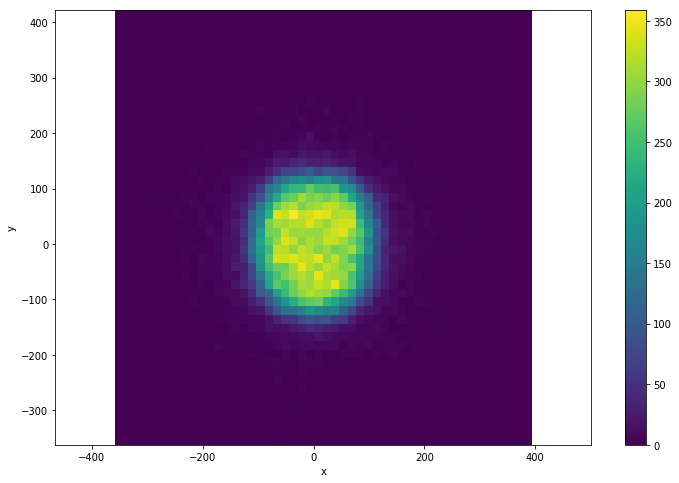

In [47]:
plt.figure(figsize=(12,8))
plt.hist2d(neutrinos.pos_x, neutrinos.pos_y, bins=50);
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.axis('equal');

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).